In [6]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Plot styling
plt.style.use('seaborn-poster')
plt.style.use('seaborn-white')
# plt.style.use('default')
# plt.rcdefaults()

def pretty_preview(df, nrow_per_frame = 5, ncol_per_frame = 5):
    '''
    Preview all columns of a dataframe by displaying samples 
    in small chunks for readability.
    
    The preview chunks will sequentially display all columns, nol_per_frame at a time.
    Each chunk samples from the first nrow_per_frame rows.
    '''
    nrow,ncol = df.shape
    start_ndx = 0
    end_ndx = np.min([ncol_per_frame,ncol])
    while end_ndx < ncol:
        ## Print small extract
        display(df.iloc[0:nrow_per_frame, start_ndx:end_ndx])
        
        ## Update
        start_ndx = end_ndx
        end_ndx += ncol_per_frame
        
        ## Check if we're at the end
        if end_ndx >= ncol: 
            end_ndx = ncol
            display(df.iloc[0:nrow_per_frame, start_ndx:end_ndx])
            break
    return None

In [2]:
## MAF Specifications are here:
## https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/
## https://wiki.nci.nih.gov/display/TCGA/Mutation+Annotation+Format+(MAF)+Specification

in_path_varscan = 'data/maf/6c93f518-1956-4435-9806-37185266d248/TCGA.BRCA.varscan.6c93f518-1956-4435-9806-37185266d248.DR-10.0.somatic.maf.gz'
in_path_muse = 'data/maf/b8ca5856-9819-459c-87c5-94e91aca4032/TCGA.BRCA.muse.b8ca5856-9819-459c-87c5-94e91aca4032.DR-10.0.somatic.maf.gz'
in_path_ss = 'data/maf/7dd592e3-5950-4438-96d5-3c718aca3f13/TCGA.BRCA.somaticsniper.7dd592e3-5950-4438-96d5-3c718aca3f13.DR-10.0.somatic.maf.gz'
in_path_mutect = 'data/maf/995c0111-d90b-4140-bee7-3845436c3b42/TCGA.BRCA.mutect.995c0111-d90b-4140-bee7-3845436c3b42.DR-10.0.somatic.maf.gz'

callers = ['varscan', 'muse', 'ss', 'mutect']
paths = [in_path_varscan, in_path_muse, in_path_ss, in_path_mutect]
frames = [pd.read_table(path, low_memory=False, compression='gzip', comment='#')
         for path in paths]

for i in range(len(frames)):
    frames[i]['CALLER'] = callers[i]
df = pd.concat(frames)
del frames

n_samples = df['case_id'].nunique()
print('Shape of combined frame: {}'.format(df.shape))
print('Number of sampled individuals: {}'.format(n_samples))
pretty_preview(df)

Shape of combined frame: (370461, 121)
Number of sampled individuals: 986


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome
0,CALML6,163688,WUGSC,GRCh38,chr1
1,PRKCZ,5590,WUGSC,GRCh38,chr1
2,CCDC27,148870,WUGSC,GRCh38,chr1
3,KCNAB2,8514,WUGSC,GRCh38,chr1
4,PNRC2,55629,WUGSC,GRCh38,chr1


,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type
0,1916819,1916819,+,Missense_Mutation,SNP
1,2172304,2172304,+,Missense_Mutation,SNP
2,3766586,3766586,+,Missense_Mutation,SNP
3,6040634,6040634,+,Silent,SNP
4,23961791,23961791,+,Missense_Mutation,SNP


,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status
0,C,C,G,NaN,NaN
1,G,G,C,NaN,NaN
2,G,G,A,NaN,NaN
3,G,G,C,NaN,NaN
4,A,A,G,novel,NaN


,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1
0,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
1,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
2,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
3,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
4,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN


,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score
0,Somatic,NaN,NaN,NaN,NaN
1,Somatic,NaN,NaN,NaN,NaN
2,Somatic,NaN,NaN,NaN,NaN
3,Somatic,NaN,NaN,NaN,NaN
4,Somatic,NaN,NaN,NaN,NaN


,BAM_File,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc
0,NaN,Illumina HiSeq 2000,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.321C>G
1,NaN,Illumina HiSeq 2000,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.1201G>C
2,NaN,Illumina HiSeq 2000,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.1504G>A
3,NaN,Illumina HiSeq 2000,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.66G>C
4,NaN,Illumina HiSeq 2000,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.334A>G


,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth
0,p.Asn107Lys,p.N107K,ENST00000307786,4/6,59
1,p.Gly401Arg,p.G401R,ENST00000378567,13/18,47
2,p.Glu502Lys,p.E502K,ENST00000294600,9/12,47
3,p.=,p.G22G,ENST00000164247,2/16,20
4,p.Ser112Gly,p.S112G,ENST00000334351,3/3,70


,t_ref_count,t_alt_count,n_depth,n_ref_count,n_alt_count
0,52,7,36,NaN,NaN
1,20,27,42,NaN,NaN
2,19,28,39,NaN,NaN
3,7,13,16,NaN,NaN
4,58,12,31,NaN,NaN


,all_effects,Allele,Gene,Feature,Feature_type
0,"CALML6,missense_variant,p.N107K,ENST0000030778...",G,ENSG00000169885,ENST00000307786,Transcript
1,"PRKCZ,missense_variant,p.G401R,ENST00000378567...",C,ENSG00000067606,ENST00000378567,Transcript
2,"CCDC27,missense_variant,p.E502K,ENST0000029460...",A,ENSG00000162592,ENST00000294600,Transcript
3,"KCNAB2,synonymous_variant,p.G22G,ENST000001642...",C,ENSG00000069424,ENST00000164247,Transcript
4,"PNRC2,missense_variant,p.S112G,ENST00000334351...",G,ENSG00000189266,ENST00000334351,Transcript


,One_Consequence,Consequence,cDNA_position,CDS_position,Protein_position
0,missense_variant,missense_variant,775/1101,321/546,107/181
1,missense_variant,missense_variant,1362/2326,1201/1779,401/592
2,missense_variant,missense_variant,1588/2176,1504/1971,502/656
3,synonymous_variant,synonymous_variant,630/4273,66/1104,22/367
4,missense_variant,missense_variant,745/2416,334/420,112/139


,Amino_acids,Codons,Existing_variation,ALLELE_NUM,DISTANCE
0,N/K,aaC/aaG,NaN,1,NaN
1,G/R,Ggc/Cgc,NaN,1,NaN
2,E/K,Gaa/Aaa,NaN,1,NaN
3,G,ggG/ggC,NaN,1,NaN
4,S/G,Agc/Ggc,NaN,1,NaN


,TRANSCRIPT_STRAND,SYMBOL,SYMBOL_SOURCE,HGNC_ID,BIOTYPE
0,1.0,CALML6,HGNC,HGNC:24193,protein_coding
1,1.0,PRKCZ,HGNC,HGNC:9412,protein_coding
2,1.0,CCDC27,HGNC,HGNC:26546,protein_coding
3,1.0,KCNAB2,HGNC,HGNC:6229,protein_coding
4,1.0,PNRC2,HGNC,HGNC:23158,protein_coding


,CANONICAL,CCDS,ENSP,SWISSPROT,TREMBL
0,YES,CCDS30566.1,ENSP00000304643,Q8TD86,NaN
1,YES,CCDS37.1,ENSP00000367830,Q05513,NaN
2,YES,CCDS50.1,ENSP00000294600,Q2M243,NaN
3,NaN,CCDS55.1,ENSP00000164247,Q13303,A0A024R4E3
4,YES,CCDS246.1,ENSP00000334840,Q9NPJ4,A0A024RAC2


,UNIPARC,RefSeq,SIFT,PolyPhen,EXON
0,UPI000034EC9B,NM_138705.2,deleterious(0.01),probably_damaging(0.957),4/6
1,UPI0000169EB7,NM_002744.4,deleterious(0),probably_damaging(0.999),13/18
2,UPI000013E186,NM_152492.2,deleterious(0),probably_damaging(0.957),9/12
3,NaN,NM_001199860.1,NaN,NaN,2/16
4,NaN,NM_017761.3,deleterious(0.02),benign(0.074),3/3


,INTRON,DOMAINS,GMAF,AFR_MAF,AMR_MAF
0,NaN,PROSITE_profiles:PS50222;Superfamily_domains:S...,NaN,NaN,NaN
1,NaN,Pfam_domain:PF00069;Pfam_domain:PF07714;PROSIT...,NaN,NaN,NaN
2,NaN,Coiled-coils_(Ncoils):ncoils,NaN,NaN,NaN
3,NaN,Prints_domain:PR01579,NaN,NaN,NaN
4,NaN,Low_complexity_(Seg):Seg,NaN,NaN,NaN


,ASN_MAF,EAS_MAF,EUR_MAF,SAS_MAF,AA_MAF
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


,EA_MAF,CLIN_SIG,SOMATIC,PUBMED,MOTIF_NAME
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,IMPACT,PICK
0,NaN,NaN,NaN,MODERATE,1.0
1,NaN,NaN,NaN,MODERATE,1.0
2,NaN,NaN,NaN,MODERATE,1.0
3,NaN,NaN,NaN,LOW,NaN
4,NaN,NaN,NaN,MODERATE,1.0


,VARIANT_CLASS,TSL,HGVS_OFFSET,PHENO,MINIMISED
0,SNV,1.0,NaN,NaN,1
1,SNV,1.0,NaN,NaN,1
2,SNV,1.0,NaN,NaN,1
3,SNV,2.0,NaN,NaN,1
4,SNV,1.0,NaN,NaN,1


,ExAC_AF,ExAC_AF_Adj,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid
0,PASS,CAGAACCAGGA,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1
1,PASS,AGGAAGGCCTG,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1
2,PASS,TCATTGAAAAG,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1
3,PASS,CCCGGGATGAT,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1
4,PASS,CACCAAGCCAC,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1


,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,174850b4-5ec2-462b-a890-89bd1716b3c2,NaN,COSM3803163,True,Unknown
1,174850b4-5ec2-462b-a890-89bd1716b3c2,NaN,COSM3803781;COSM3803782,True,Unknown
2,174850b4-5ec2-462b-a890-89bd1716b3c2,NaN,COSM3805079,True,Unknown
3,174850b4-5ec2-462b-a890-89bd1716b3c2,NaN,COSM3805665;COSM5832645,True,Unknown
4,174850b4-5ec2-462b-a890-89bd1716b3c2,NaN,NaN,False,Unknown


,CALLER
0,varscan
1,varscan
2,varscan
3,varscan
4,varscan


In [3]:
## Perhaps a better way to do the above: rather than make the 'caller' column, just concat and
## remove duplicates

paths = [in_path_varscan, in_path_muse, in_path_ss, in_path_mutect]
frames = [pd.read_table(path, low_memory=False, compression='gzip', comment='#')
         for path in paths]
df = pd.concat(frames)
del frames

n_samples = df['case_id'].nunique()
print('Shape of combined frame: {}'.format(df.shape))
print('Number of sampled individuals: {}'.format(n_samples))
pretty_preview(df)

Shape of combined frame: (370461, 120)
Number of sampled individuals: 986


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome
0,CALML6,163688,WUGSC,GRCh38,chr1
1,PRKCZ,5590,WUGSC,GRCh38,chr1
2,CCDC27,148870,WUGSC,GRCh38,chr1
3,KCNAB2,8514,WUGSC,GRCh38,chr1
4,PNRC2,55629,WUGSC,GRCh38,chr1


,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type
0,1916819,1916819,+,Missense_Mutation,SNP
1,2172304,2172304,+,Missense_Mutation,SNP
2,3766586,3766586,+,Missense_Mutation,SNP
3,6040634,6040634,+,Silent,SNP
4,23961791,23961791,+,Missense_Mutation,SNP


,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status
0,C,C,G,NaN,NaN
1,G,G,C,NaN,NaN
2,G,G,A,NaN,NaN
3,G,G,C,NaN,NaN
4,A,A,G,novel,NaN


,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1
0,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
1,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
2,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
3,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN
4,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0-10A-01D-A23C-09,NaN,NaN,NaN


,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score
0,Somatic,NaN,NaN,NaN,NaN
1,Somatic,NaN,NaN,NaN,NaN
2,Somatic,NaN,NaN,NaN,NaN
3,Somatic,NaN,NaN,NaN,NaN
4,Somatic,NaN,NaN,NaN,NaN


,BAM_File,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc
0,NaN,Illumina HiSeq 2000,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.321C>G
1,NaN,Illumina HiSeq 2000,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.1201G>C
2,NaN,Illumina HiSeq 2000,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.1504G>A
3,NaN,Illumina HiSeq 2000,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.66G>C
4,NaN,Illumina HiSeq 2000,d8fbb398-d1da-4444-984a-22c8523625da,46e1fd58-c2ea-46ef-bfc9-26d61e7be608,c.334A>G


,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth
0,p.Asn107Lys,p.N107K,ENST00000307786,4/6,59
1,p.Gly401Arg,p.G401R,ENST00000378567,13/18,47
2,p.Glu502Lys,p.E502K,ENST00000294600,9/12,47
3,p.=,p.G22G,ENST00000164247,2/16,20
4,p.Ser112Gly,p.S112G,ENST00000334351,3/3,70


,t_ref_count,t_alt_count,n_depth,n_ref_count,n_alt_count
0,52,7,36,NaN,NaN
1,20,27,42,NaN,NaN
2,19,28,39,NaN,NaN
3,7,13,16,NaN,NaN
4,58,12,31,NaN,NaN


,all_effects,Allele,Gene,Feature,Feature_type
0,"CALML6,missense_variant,p.N107K,ENST0000030778...",G,ENSG00000169885,ENST00000307786,Transcript
1,"PRKCZ,missense_variant,p.G401R,ENST00000378567...",C,ENSG00000067606,ENST00000378567,Transcript
2,"CCDC27,missense_variant,p.E502K,ENST0000029460...",A,ENSG00000162592,ENST00000294600,Transcript
3,"KCNAB2,synonymous_variant,p.G22G,ENST000001642...",C,ENSG00000069424,ENST00000164247,Transcript
4,"PNRC2,missense_variant,p.S112G,ENST00000334351...",G,ENSG00000189266,ENST00000334351,Transcript


,One_Consequence,Consequence,cDNA_position,CDS_position,Protein_position
0,missense_variant,missense_variant,775/1101,321/546,107/181
1,missense_variant,missense_variant,1362/2326,1201/1779,401/592
2,missense_variant,missense_variant,1588/2176,1504/1971,502/656
3,synonymous_variant,synonymous_variant,630/4273,66/1104,22/367
4,missense_variant,missense_variant,745/2416,334/420,112/139


,Amino_acids,Codons,Existing_variation,ALLELE_NUM,DISTANCE
0,N/K,aaC/aaG,NaN,1,NaN
1,G/R,Ggc/Cgc,NaN,1,NaN
2,E/K,Gaa/Aaa,NaN,1,NaN
3,G,ggG/ggC,NaN,1,NaN
4,S/G,Agc/Ggc,NaN,1,NaN


,TRANSCRIPT_STRAND,SYMBOL,SYMBOL_SOURCE,HGNC_ID,BIOTYPE
0,1.0,CALML6,HGNC,HGNC:24193,protein_coding
1,1.0,PRKCZ,HGNC,HGNC:9412,protein_coding
2,1.0,CCDC27,HGNC,HGNC:26546,protein_coding
3,1.0,KCNAB2,HGNC,HGNC:6229,protein_coding
4,1.0,PNRC2,HGNC,HGNC:23158,protein_coding


,CANONICAL,CCDS,ENSP,SWISSPROT,TREMBL
0,YES,CCDS30566.1,ENSP00000304643,Q8TD86,NaN
1,YES,CCDS37.1,ENSP00000367830,Q05513,NaN
2,YES,CCDS50.1,ENSP00000294600,Q2M243,NaN
3,NaN,CCDS55.1,ENSP00000164247,Q13303,A0A024R4E3
4,YES,CCDS246.1,ENSP00000334840,Q9NPJ4,A0A024RAC2


,UNIPARC,RefSeq,SIFT,PolyPhen,EXON
0,UPI000034EC9B,NM_138705.2,deleterious(0.01),probably_damaging(0.957),4/6
1,UPI0000169EB7,NM_002744.4,deleterious(0),probably_damaging(0.999),13/18
2,UPI000013E186,NM_152492.2,deleterious(0),probably_damaging(0.957),9/12
3,NaN,NM_001199860.1,NaN,NaN,2/16
4,NaN,NM_017761.3,deleterious(0.02),benign(0.074),3/3


,INTRON,DOMAINS,GMAF,AFR_MAF,AMR_MAF
0,NaN,PROSITE_profiles:PS50222;Superfamily_domains:S...,NaN,NaN,NaN
1,NaN,Pfam_domain:PF00069;Pfam_domain:PF07714;PROSIT...,NaN,NaN,NaN
2,NaN,Coiled-coils_(Ncoils):ncoils,NaN,NaN,NaN
3,NaN,Prints_domain:PR01579,NaN,NaN,NaN
4,NaN,Low_complexity_(Seg):Seg,NaN,NaN,NaN


,ASN_MAF,EAS_MAF,EUR_MAF,SAS_MAF,AA_MAF
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


,EA_MAF,CLIN_SIG,SOMATIC,PUBMED,MOTIF_NAME
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,IMPACT,PICK
0,NaN,NaN,NaN,MODERATE,1.0
1,NaN,NaN,NaN,MODERATE,1.0
2,NaN,NaN,NaN,MODERATE,1.0
3,NaN,NaN,NaN,LOW,NaN
4,NaN,NaN,NaN,MODERATE,1.0


,VARIANT_CLASS,TSL,HGVS_OFFSET,PHENO,MINIMISED
0,SNV,1.0,NaN,NaN,1
1,SNV,1.0,NaN,NaN,1
2,SNV,1.0,NaN,NaN,1
3,SNV,2.0,NaN,NaN,1
4,SNV,1.0,NaN,NaN,1


,ExAC_AF,ExAC_AF_Adj,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid
0,PASS,CAGAACCAGGA,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1
1,PASS,AGGAAGGCCTG,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1
2,PASS,TCATTGAAAAG,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1
3,PASS,CCCGGGATGAT,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1
4,PASS,CACCAAGCCAC,83feabf8-563f-477c-b55c-40ab44223d1d,73fc90f7-cb81-49c5-8677-3ad5bda5f7d9,573e263e-39ad-4779-a7fd-5830684e9cb1


,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,174850b4-5ec2-462b-a890-89bd1716b3c2,NaN,COSM3803163,True,Unknown
1,174850b4-5ec2-462b-a890-89bd1716b3c2,NaN,COSM3803781;COSM3803782,True,Unknown
2,174850b4-5ec2-462b-a890-89bd1716b3c2,NaN,COSM3805079,True,Unknown
3,174850b4-5ec2-462b-a890-89bd1716b3c2,NaN,COSM3805665;COSM5832645,True,Unknown
4,174850b4-5ec2-462b-a890-89bd1716b3c2,NaN,NaN,False,Unknown


In [4]:
## Rename columns
## Subset based on column names

old_cols = [
    'SYMBOL', 'Chromosome', 'Start_Position','End_Position', 'Variant_Classification', 
    'Variant_Type', 'Reference_Allele', 'Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2',
    'Mutation_Status', 'Sequence_Source', 'Tumor_Sample_Barcode', 'Consequence', 'IMPACT',
    'VARIANT_CLASS',
]
keep_cols = [
    'GENE', 'CHR', 'START', 'END', 'CLASS', 'TYPE', 'REF', 'ALT', 'A1', 'A2', 
    'MUT_STATUS', 'SOURCE', 'BARCODE', 'CONSEQUENCE', 'IMPACT', 'CLASS2',
]
col_name_map = dict(zip(old_cols,keep_cols))
df.rename(columns=col_name_map, inplace=True)
df = df.loc[:,keep_cols]
df['SAMPLE'] = df.BARCODE.str[0:12]
df.drop_duplicates(inplace = True)
pretty_preview(df)

,GENE,CHR,START,END,CLASS
0,CALML6,chr1,1916819,1916819,Missense_Mutation
1,PRKCZ,chr1,2172304,2172304,Missense_Mutation
2,CCDC27,chr1,3766586,3766586,Missense_Mutation
3,KCNAB2,chr1,6040634,6040634,Silent
4,PNRC2,chr1,23961791,23961791,Missense_Mutation


,TYPE,REF,ALT,A1,A2
0,SNP,C,G,C,G
1,SNP,G,C,G,C
2,SNP,G,A,G,A
3,SNP,G,C,G,C
4,SNP,A,G,A,G


,MUT_STATUS,SOURCE,BARCODE,CONSEQUENCE,IMPACT
0,Somatic,NaN,TCGA-A2-A3Y0-01A-11D-A23C-09,missense_variant,MODERATE
1,Somatic,NaN,TCGA-A2-A3Y0-01A-11D-A23C-09,missense_variant,MODERATE
2,Somatic,NaN,TCGA-A2-A3Y0-01A-11D-A23C-09,missense_variant,MODERATE
3,Somatic,NaN,TCGA-A2-A3Y0-01A-11D-A23C-09,synonymous_variant,LOW
4,Somatic,NaN,TCGA-A2-A3Y0-01A-11D-A23C-09,missense_variant,MODERATE


,CLASS2,SAMPLE
0,SNV,TCGA-A2-A3Y0
1,SNV,TCGA-A2-A3Y0
2,SNV,TCGA-A2-A3Y0
3,SNV,TCGA-A2-A3Y0
4,SNV,TCGA-A2-A3Y0


Stats to explore:

* Breakdown by individual
     * I did breakdown by most number of total mutations, but maybe I should also try unique per gene or unique per (more intelligent grouping - functional?)
* Genes with most number of unique mutations
* Genes with most number of total mutations
* Genes with most number of unique individuals mutatated
* Genes with most number of total individuals mutated
* All of the above but stratified by e.g. variant type or impact


Number of unique
	Samples: 986
	Genes: 19167
	Mutation Classes: 18

Counts for all 18 mutation classes:


Missense_Mutation         66930
Silent                    24076
3'UTR                     11160
Intron                     7068
Nonsense_Mutation          6099
Frame_Shift_Del            3690
5'UTR                      3442
RNA                        2568
Frame_Shift_Ins            1988
Splice_Site                1940
Splice_Region              1551
3'Flank                    1138
5'Flank                     914
In_Frame_Del                870
In_Frame_Ins                433
Nonstop_Mutation             94
Translation_Start_Site       91
IGR                          14
Name: CLASS, dtype: int64

Text(0.5,1,'Classes of Mutations Found')

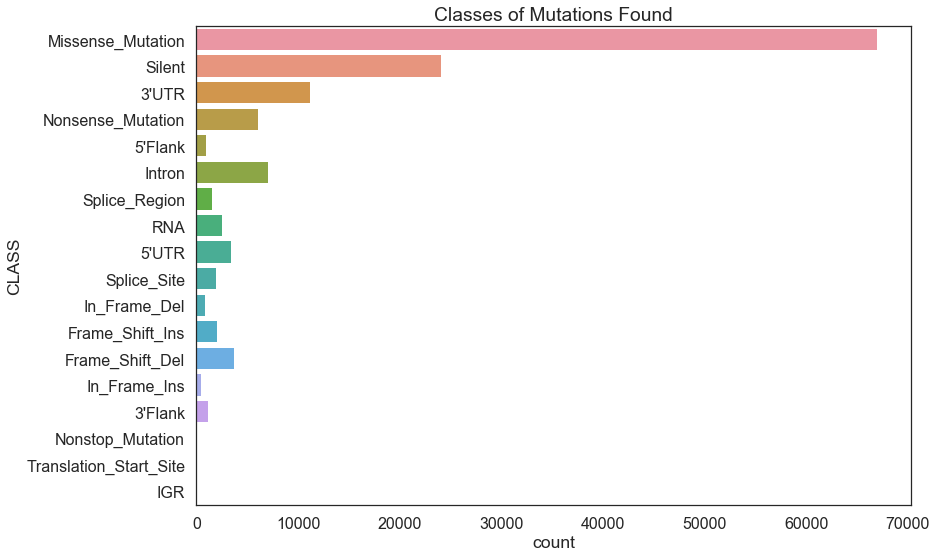

In [7]:
## Total number of mutations found

n_genes = df.GENE.nunique()
n_samples = df.BARCODE.nunique()
n_mutation_classes = df.CLASS.nunique()
print('Number of unique\n\tSamples: {}\n\tGenes: {}\n\tMutation Classes: {}\n'.format(
    n_samples, n_genes, n_mutation_classes))

print('Counts for all {} mutation classes:'.format(n_mutation_classes))
display(df.CLASS.value_counts())

## Simple count plot
sns.countplot(y='CLASS', data=df)
plt.title('Classes of Mutations Found')

Most mutations:
SAMPLE
TCGA-AN-A046    7951
TCGA-AC-A23H    6735
TCGA-5L-AAT1    2117
TCGA-BH-A18G    2046
TCGA-AN-A0AK    2031
TCGA-A8-A09Z    1949
TCGA-BH-A0HF    1702
TCGA-AO-A128    1644
TCGA-D8-A1XK    1543
TCGA-BH-A0B6    1420
TCGA-D8-A1XQ    1277
TCGA-D8-A1JA    1268
TCGA-D8-A27G    1192
TCGA-D8-A1J8    1138
TCGA-AR-A0U0    1125
dtype: int64

Least least mutations:
SAMPLE
TCGA-BH-A1FR    19
TCGA-A2-A0ES    18
TCGA-AC-A2FB    17
TCGA-AR-A252    16
TCGA-AR-A24W    16
TCGA-LL-A440    16
TCGA-AO-A1KO    15
TCGA-A2-A1G6    12
TCGA-A8-A08C     9
TCGA-A2-A25F     7
dtype: int64


Text(0,0.5,'Number of Mutations')

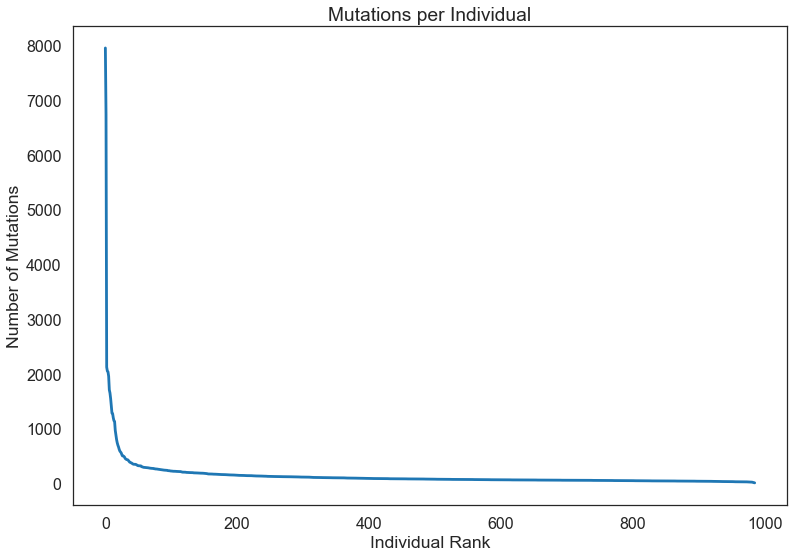

In [8]:
## Mutated individuals
df1 = df.groupby('SAMPLE').size().sort_values(ascending=False)
print('Most mutations:')
print(df1.iloc[0:15])
print('\nLeast least mutations:')
print(df1.iloc[-11:-1])

plt.plot(df1.values)
plt.title('Mutations per Individual')
plt.xlabel('Individual Rank')
plt.ylabel('Number of Mutations')

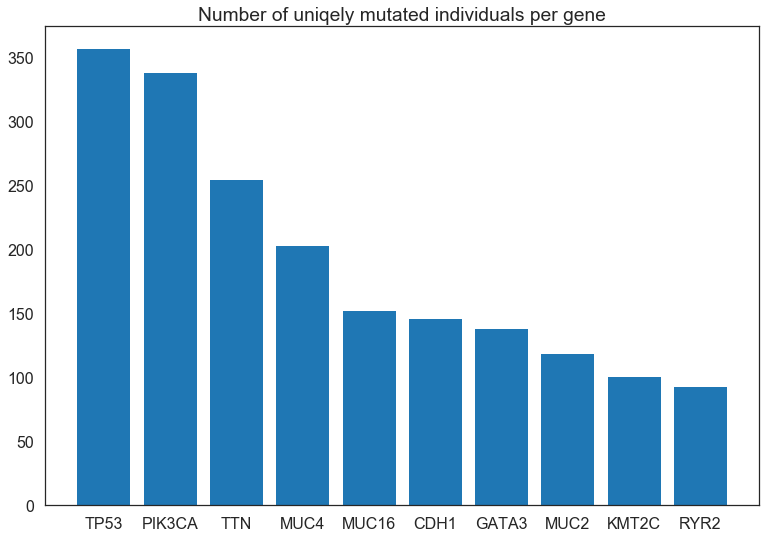

Text(0.5,1,'Number of Mutations Found Total (not unique)')

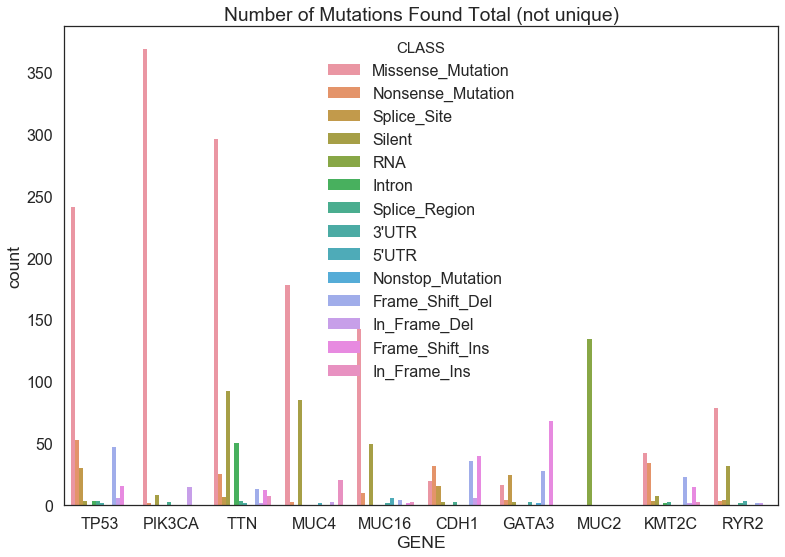

In [19]:
## Most mutated genes

## Plot params
n_genes_to_plot = 10

## Calculate most mutated unique samples per gene
samples_mutated_per_gene = df.groupby('GENE').BARCODE.nunique()
samples_mutated_per_gene.sort_values(ascending=False,inplace=True)
top_genes = samples_mutated_per_gene.index.tolist()[0:n_genes_to_plot]
top_counts = samples_mutated_per_gene.values.tolist()[0:n_genes_to_plot]


## Plot
plt.bar(np.arange(n_genes_to_plot), top_counts)
plt.xticks(np.arange(n_genes_to_plot),top_genes)
plt.title('Number of uniqely mutated individuals per gene')
plt.show()

## 
ignore_classes = [''] # e.g. ['WT'] to ignore WT if there were any
sns.countplot(x='GENE',
              hue = 'CLASS',
              order = top_genes,
              data=df[~df.CLASS.isin(ignore_classes) & df.GENE.isin(top_genes)])
plt.title('Number of Mutations Found Total (not unique)')

In [20]:
print(plt.style.available)

['seaborn-darkgrid', 'seaborn-paper', '_classic_test', 'seaborn-dark', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-whitegrid', 'classic', 'seaborn-poster', 'ggplot', 'Solarize_Light2', 'seaborn-bright', 'seaborn', 'seaborn-notebook', 'dark_background', 'fivethirtyeight', 'grayscale', 'seaborn-white', 'bmh', 'seaborn-colorblind', 'seaborn-muted', 'seaborn-talk', 'seaborn-ticks', 'fast', 'seaborn-deep']


In [21]:
print(df[df.GENE.isin(top_genes) & df.MUTATION_TYPE.isin(['WT'])])
print(df[df.MUTATION_TYPE.isin(['WT'])])
print(df[df.GENE.isin(top_genes)])
# dat=df[df.MUTATION_TYPE != 'WT' & df.GENE in top_genes]

AttributeError: 'DataFrame' object has no attribute 'MUTATION_TYPE'